In [5]:
using Pkg
Pkg.activate(".")
using DataFrames
using CSV
using VegaLite

  Activating project at `~/Main/EMAp/GaleraDeSempre`
┌ Info: Precompiling VegaLite [112f6efa-9a02-5b7d-90c0-432ed331239a]
└ @ Base loading.jl:1423


In [7]:
df = CSV.read("DesafioDeSempre.csv",DataFrame);

In [33]:
maximum(df.Semana)

20

In [147]:
df = sort(df,:Semana)

df = combine(groupby(df,:Pessoa),:Exercicios=>cumsum=>:Acumulado, :Semana, :Exercicios)

,Pessoa,Acumulado,Semana,Exercicios
,String15,Int64,Int64,Int64
1,Davi,3,1,3
2,Davi,5,2,2
3,Davi,5,3,0
4,Davi,11,4,6
5,Davi,12,5,1
6,Davi,15,6,3
7,Davi,17,7,2
8,Davi,19,8,2
9,Davi,20,9,1


In [148]:
using Statistics
gdf = combine(groupby(df, :Pessoa), :Exercicios => sum => :Exercicios, :Exercicios => mean => :MediaSemanal, renamecols=false)

,Pessoa,Exercicios,MediaSemanal
,String15,Int64,Float64
1,Davi,45,2.25
2,Lara,29,1.45
3,Alberto,94,4.7
4,Mineiro,21,1.05
5,Mariana,25,1.25
6,Leo,92,4.6
7,Cecília,56,2.8
8,Henrique,87,4.35
9,Quezia,82,4.1


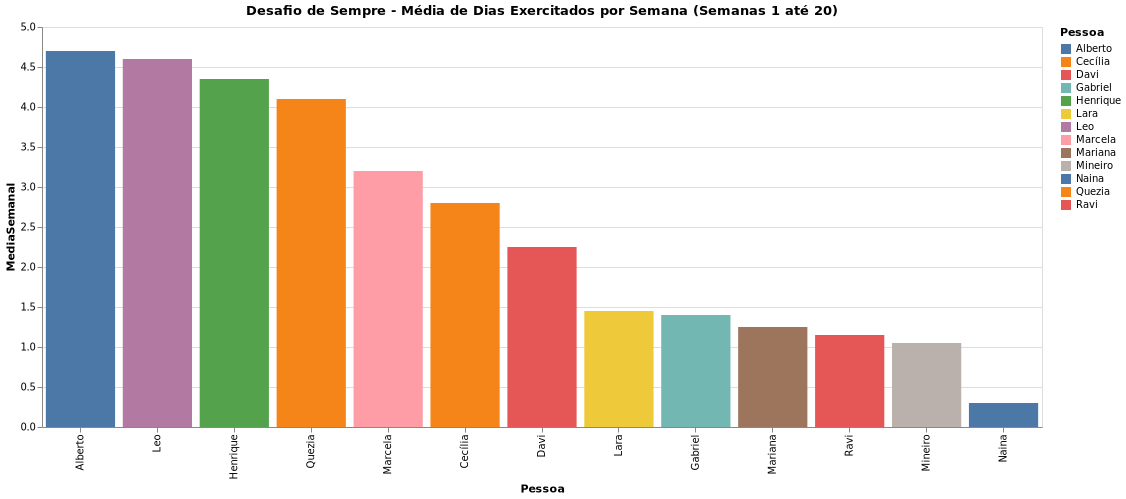

In [127]:
p1 = @vlplot(
    data=gdf,
    title="Desafio de Sempre - Média de Dias Exercitados por Semana (Semanas 1 até 20)",
    color=:Pessoa,
    x={:Pessoa, sort="-y"},
    y={"MediaSemanal"},
    mark = {type="text", align="center", baseline = "middle", dy = -5},
    text = {"MediaSemanal", sort="-y"},
    width=1000,
    height=400,
)
p2 = @vlplot(
    data=gdf,
    title="Desafio de Sempre - Média de Dias Exercitados por Semana (Semanas 1 até 20)",
    color=:Pessoa,
    x={:Pessoa, sort="-y"},
    y={"MediaSemanal"},
    mark = :bar,
    width=1000,
    height=400,
)


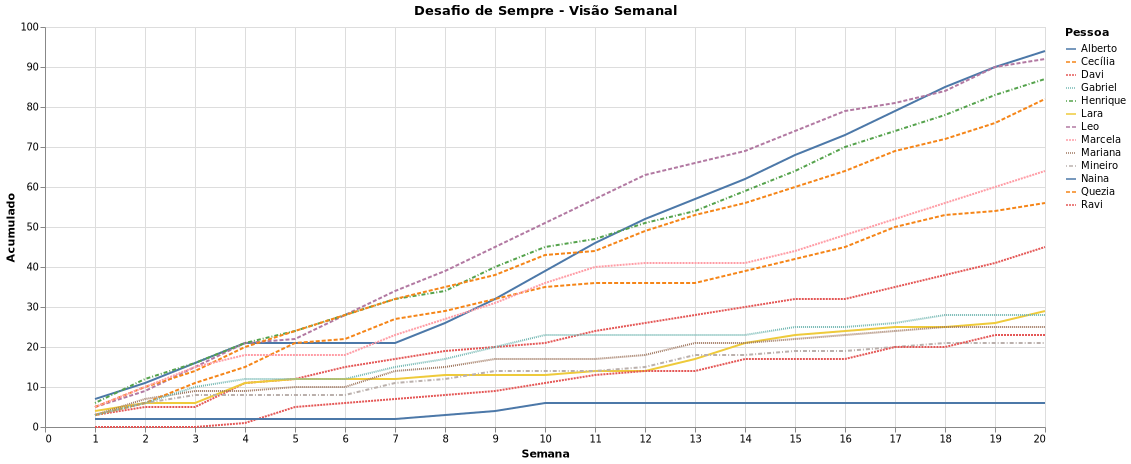

In [152]:
@vlplot(
    data=df,
    title="Desafio de Sempre - Visão Semanal",
    mark = :line,
    color=:Pessoa,
    x=:Semana,
    y=:Acumulado,
    strokeDash = :Pessoa,
    width=1000,
    height=400,
)